Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore". Suppose,you are the buisness owner of retail firm and want to see how your company is performing.You are interested to find out the weak areas where you can work to make profit.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("data.csv")
df.tail(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [11]:
df.shape

(9994, 13)

In [12]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
correlation = df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [17]:
df.drop('Country', axis=1, inplace=True)
df.tail(1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9993,Second Class,Consumer,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [18]:
df.shape

(9994, 12)

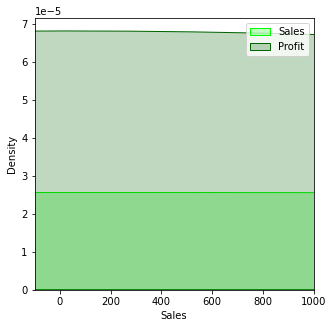

In [19]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['Sales'],color='lime',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='darkgreen',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Text(0.5, 1.0, 'Correlation')

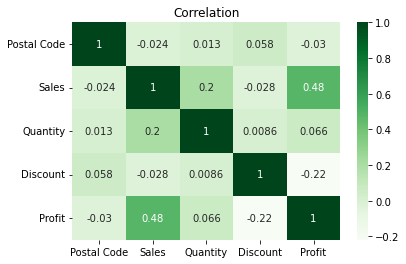

In [20]:
sns.heatmap(correlation,annot=True,cmap='Greens')
plt.title('Correlation')

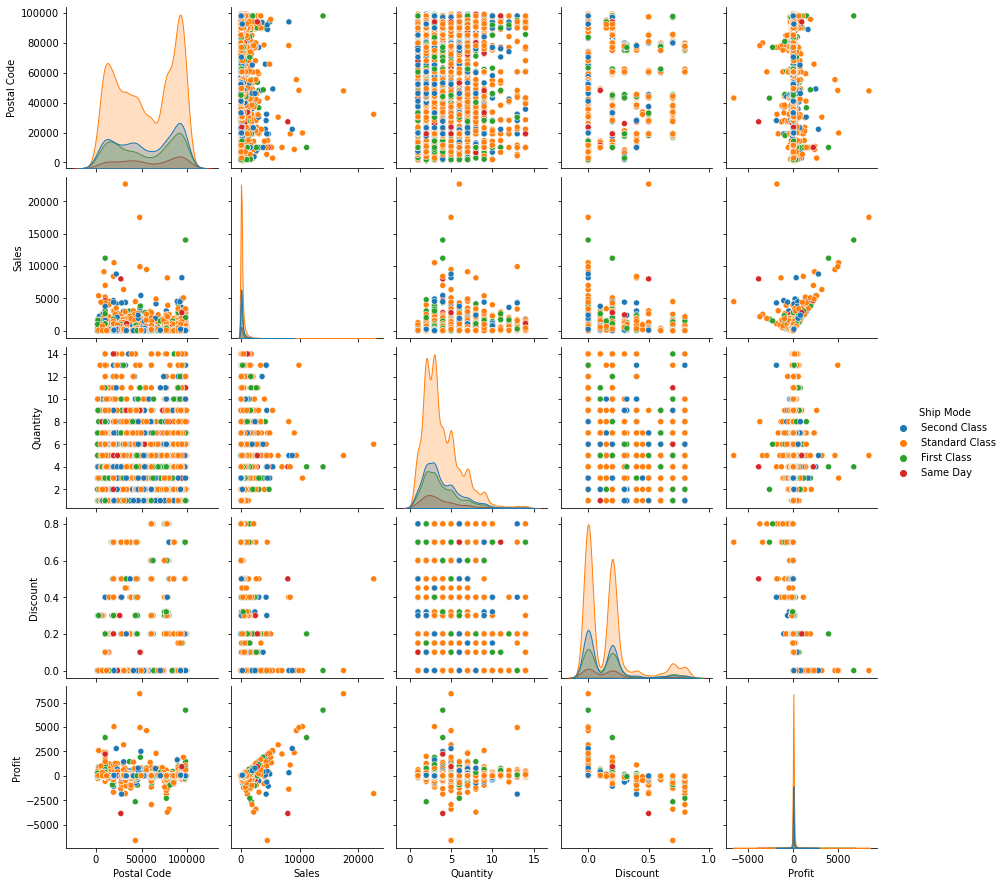

In [28]:
sns.pairplot(df,hue='Ship Mode')

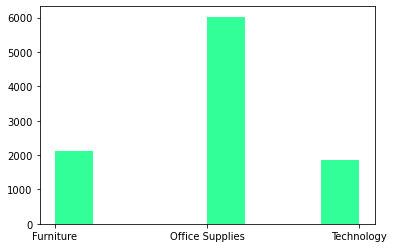

In [30]:
num_bins = 8
plt.hist(df['Category'], num_bins, facecolor ='springgreen' , alpha = 0.8)
plt.show()

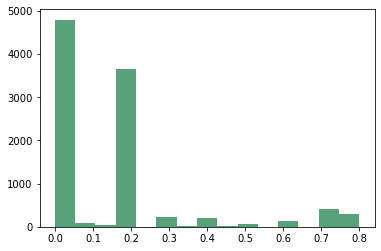

In [27]:
num_bins = 15
plt.hist(df['Discount'], num_bins, facecolor ='seagreen' , alpha = 0.8)
plt.show()

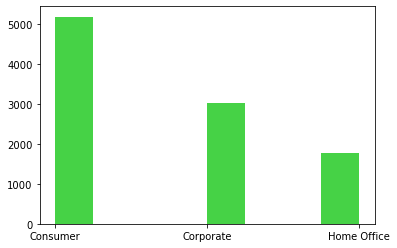

In [31]:
num_bins = 8
plt.hist(df['Segment'], num_bins, facecolor ='limegreen' , alpha = 0.9)
plt.show()

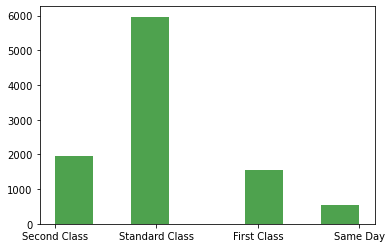

In [32]:
num_bins = 8
plt.hist(df['Ship Mode'], num_bins, facecolor ='forestgreen' , alpha = 0.8)
plt.show()

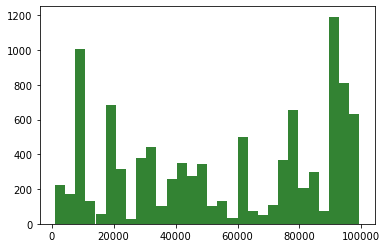

In [33]:
num_bins = 30
plt.hist(df['Postal Code'], num_bins, facecolor ='darkgreen' , alpha = 0.8)
plt.show()

Text(0, 0.5, 'Sales')

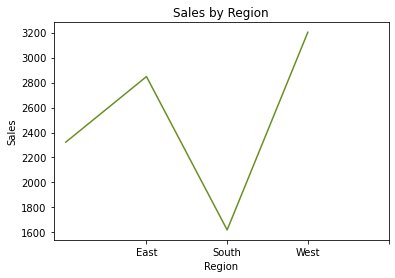

In [34]:
sales_by_region = df.groupby('Region').size()
plot_by_region = sales_by_region.plot(title='Sales by Region',xticks=(1,2,3,4,),color='olivedrab')
plot_by_region.set_xlabel('Region')
plot_by_region.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

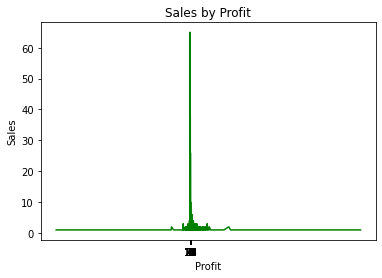

In [35]:
sales_by_profit = df.groupby('Profit').size()
plot_by_profit = sales_by_profit.plot(title='Sales by Profit', xticks = range(0, 30), color='green')
plot_by_profit.set_xlabel('Profit')
plot_by_profit.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

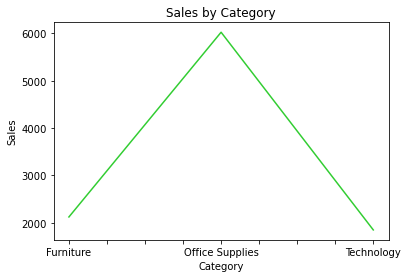

In [36]:
sales_by_category = df.groupby('Category').size()
plot_by_category = sales_by_category.plot(title='Sales by Category', color='limegreen')
plot_by_category.set_xlabel('Category')
plot_by_category.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

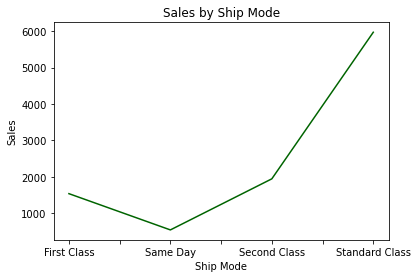

In [37]:
sales_by_shipmode = df.groupby('Ship Mode').size()
sales_by_shipmode = sales_by_shipmode.plot(title='Sales by Ship Mode',color='darkgreen')
sales_by_shipmode.set_xlabel('Ship Mode')
sales_by_shipmode.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

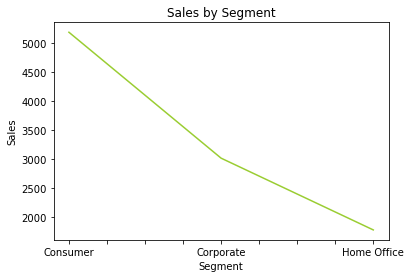

In [38]:
sales_by_segment = df.groupby('Segment').size()
sales_by_segment = sales_by_segment.plot(title='Sales by Segment', color='yellowgreen')
sales_by_segment.set_xlabel('Segment')
sales_by_segment.set_ylabel('Sales')

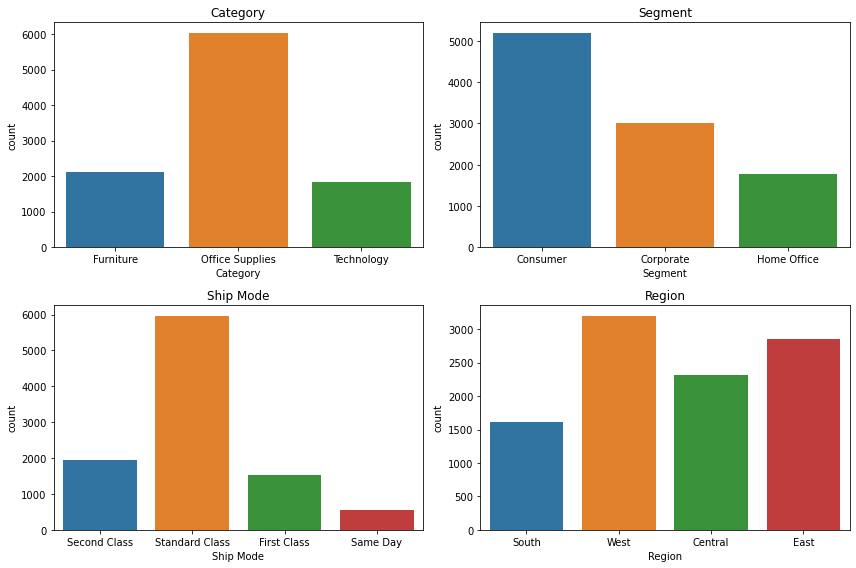

In [39]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,8));
sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=12)
axs[0][1].set_title('Segment',fontsize=12)
axs[1][0].set_title('Ship Mode',fontsize=12)
axs[1][1].set_title('Region',fontsize=12)
plt.tight_layout()

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

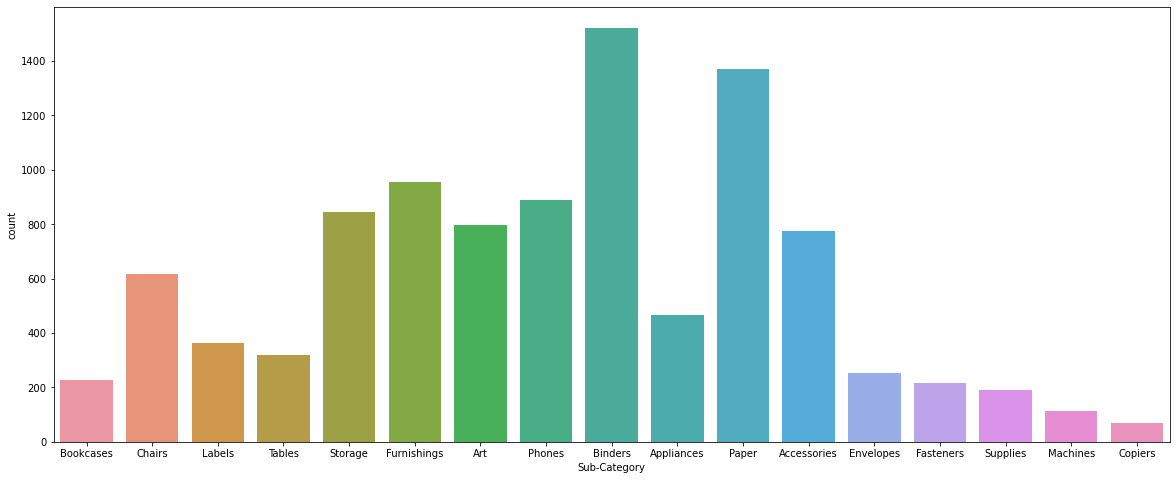

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])

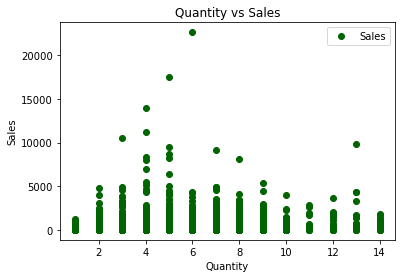

In [41]:
df.plot(x='Quantity', y='Sales', style='o', color='darkgreen')
plt.title('Quantity vs Sales', fontsize=12)  
plt.xlabel('Quantity')  
plt.ylabel('Sales')  
plt.show()

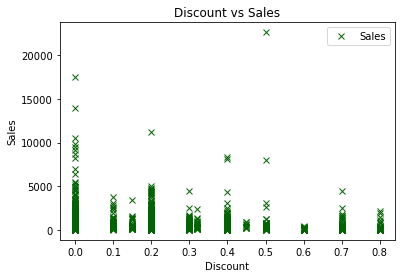

In [42]:
df.plot(x='Discount', y='Sales', style='x', color='darkgreen')
plt.title('Discount vs Sales')  
plt.xlabel('Discount')  
plt.ylabel('Sales')  
plt.show()

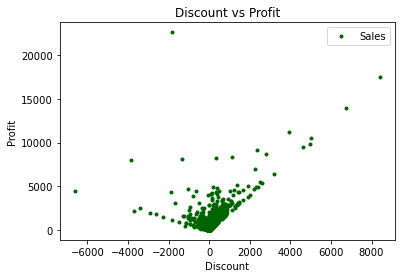

In [43]:
df.plot(x='Profit', y='Sales', style='.', color='darkgreen')
plt.title('Discount vs Profit')  
plt.xlabel('Discount')  
plt.ylabel('Profit')  
plt.show()

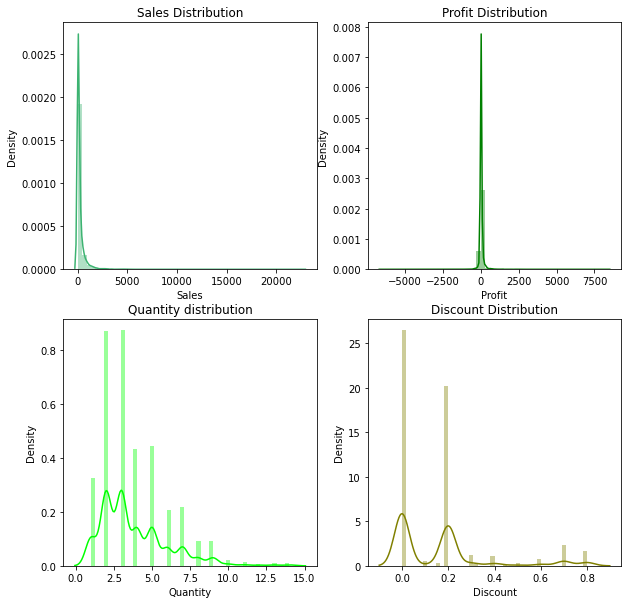

In [44]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'mediumseagreen',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'lime',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'olive',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 12)
axs[0][1].set_title('Profit Distribution', fontsize = 12)
axs[1][0].set_title('Quantity distribution', fontsize = 12)
axs[1][1].set_title('Discount Distribution', fontsize = 12)
plt.show()

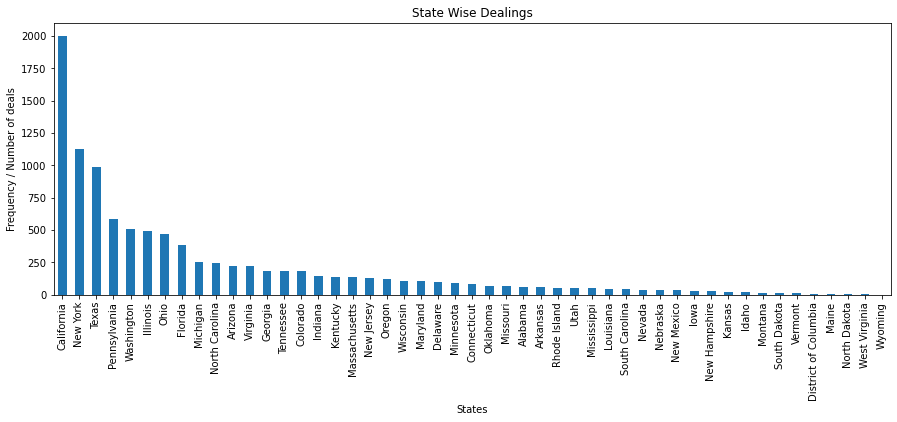

In [45]:
df1 = df['State'].value_counts()
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 12)
plt.show()

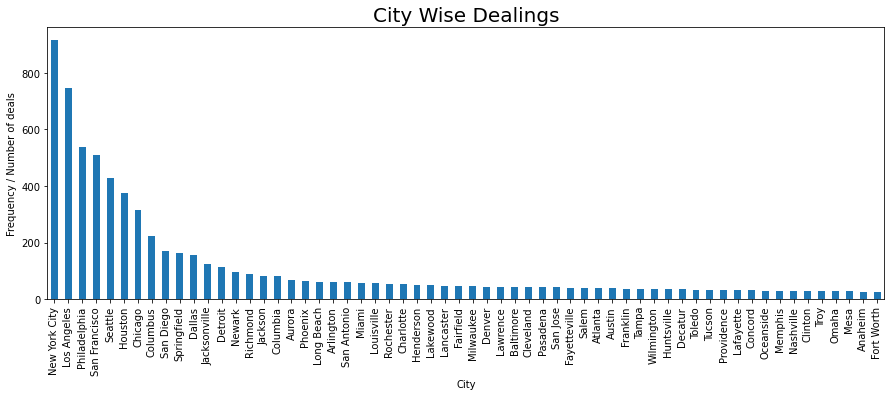

In [46]:
df2 = df['City'].value_counts()
df2=df2.head(60)
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 20)
plt.show()

In [47]:
df['City'].value_counts().mean()

18.821092278719398

In [48]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [49]:
df_segment= df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment Wise Analysis')

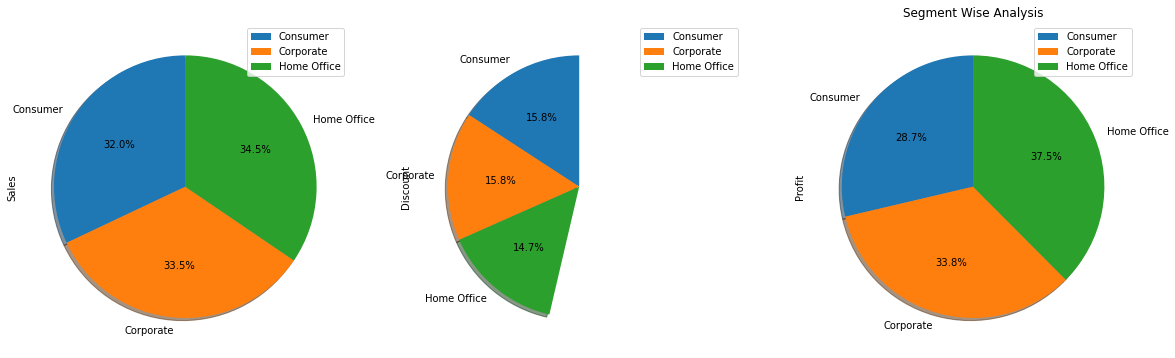

In [50]:
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20,22),
                    startangle=90,     
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment Wise Analysis')

Text(0.5, 1.0, 'Quantity Wise Analysis')

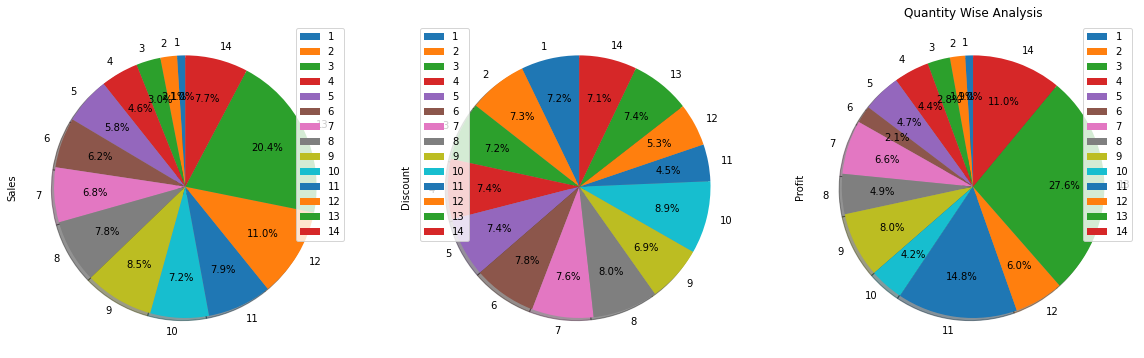

In [51]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity Wise Analysis')

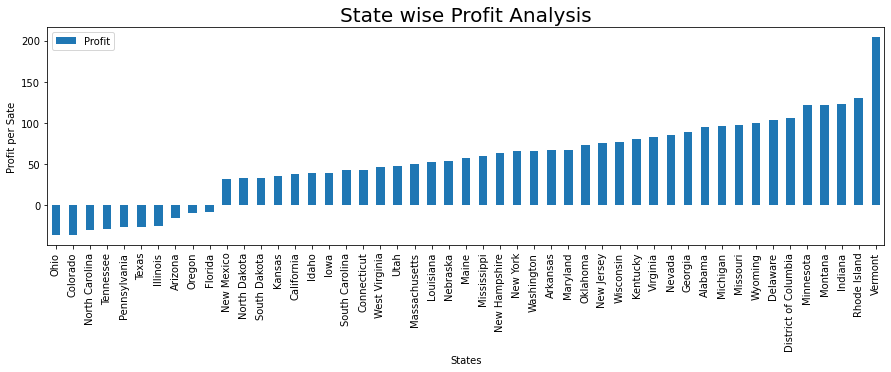

In [52]:
df['State'].value_counts().head(10)
df_state= df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(10)
df_state1=df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

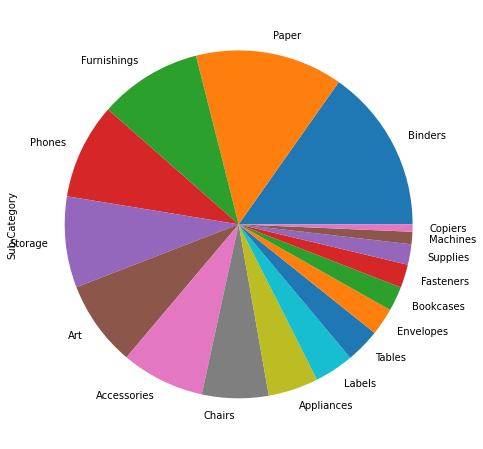

In [53]:
plt.figure(figsize=(10,8))
df['Sub-Category'].value_counts().plot.pie(autopct='')
plt.show()

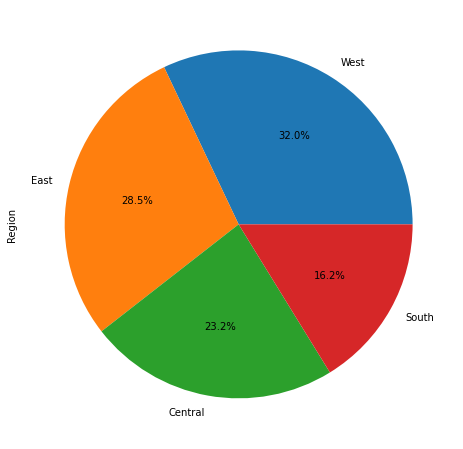

In [54]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

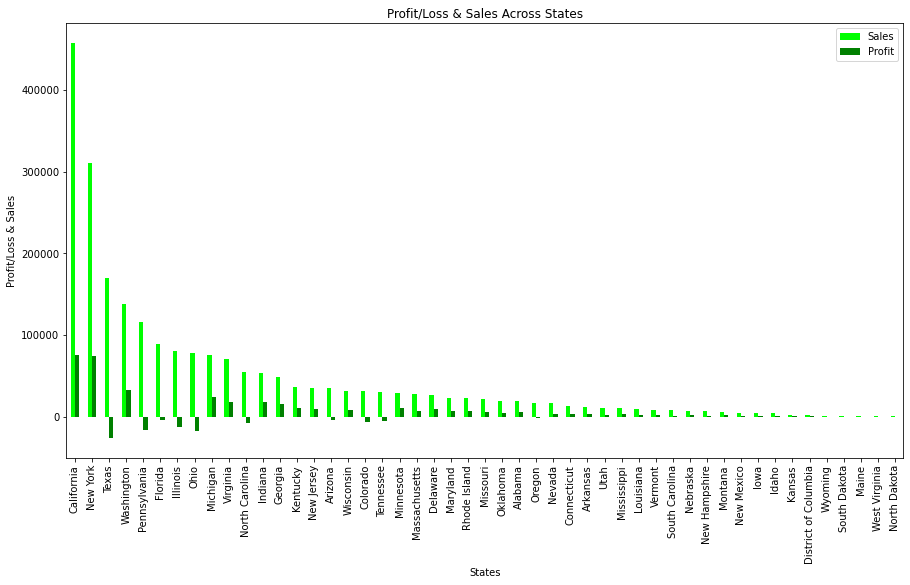

In [55]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['lime','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across States')
plt.xlabel('States')
plt.ylabel('Profit/Loss & Sales')
plt.show()

Text(0.5, 1.0, 'State Wise Analysis')

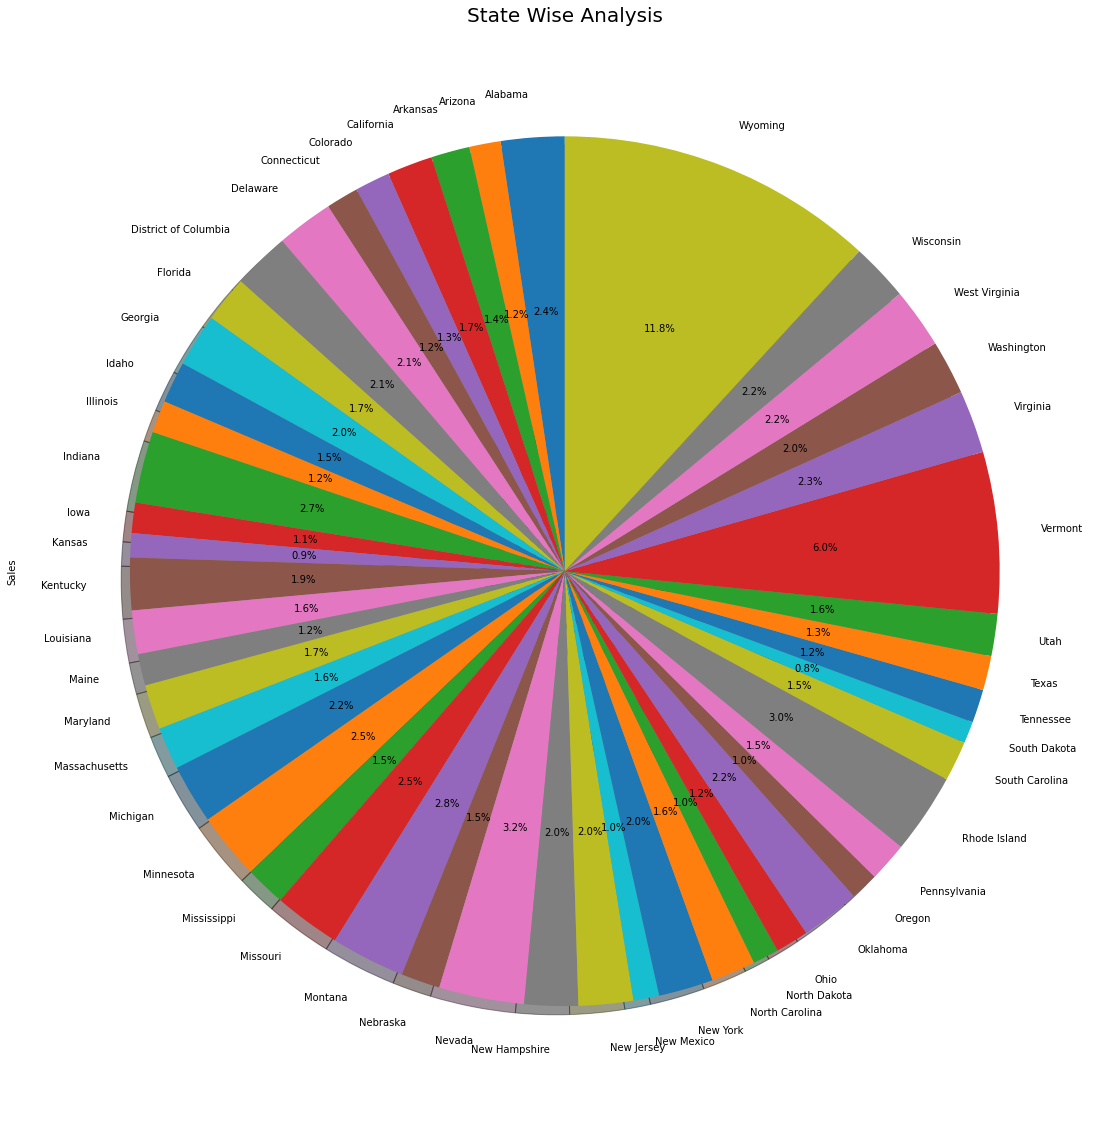

In [56]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State Wise Analysis',fontsize=20)